In [1]:
pip install artpop

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Project import
import artpop

In [3]:
# artpop's matplotlib style
plt.style.use(artpop.mpl_style)
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]

# use this random state for reproducibility
rng = np.random.RandomState(112)

In [40]:
ssp_old = artpop.MISTSSP(
    log_age = 10.1,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)
RGB_Old = ssp_old.select_phase('RGB')

In [5]:
ssp_int = artpop.MISTSSP(
    log_age = 9.5,          # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 1e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)
RGB_Int = ssp_int.select_phase('RGB')

In [6]:
ssp_young= artpop.MISTSSP(
    log_age = 8.5,          # log of age in years
    feh = 0,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)
RGB_Young = ssp_young.select_phase('RGB')

In [7]:
ssp_agb = artpop.MISTSSP(
    log_age = 8.5,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e6,      # number of stars
    random_state = rng,   # random state for reproducibility
)
agb_young = ssp_agb.select_phase('AGB')
artpop.get_filter_names('UBVRIplus')

['Bessell_U',
 'Bessell_B',
 'Bessell_V',
 'Bessell_R',
 'Bessell_I',
 '2MASS_J',
 '2MASS_H',
 '2MASS_Ks',
 'Kepler_Kp',
 'Kepler_D51',
 'Hipparcos_Hp',
 'Tycho_B',
 'Tycho_V',
 'Gaia_G_DR2Rev',
 'Gaia_BP_DR2Rev',
 'Gaia_RP_DR2Rev',
 'Gaia_G_MAW',
 'Gaia_BP_MAWb',
 'Gaia_BP_MAWf',
 'Gaia_RP_MAW',
 'TESS']

In [8]:
ssp_agbold = artpop.MISTSSP(
    log_age = 10.1,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e6,      # number of stars
    random_state = rng,   # random state for reproducibility
)
agb_old = ssp_agbold.select_phase('AGB')

In [9]:
ssp_agbint = artpop.MISTSSP(
    log_age = 10.1,          # log of age in years
    feh = -1.5,             # metallicity [Fe/H]
    phot_system = 'UBVRIplus', # photometric system(s)
    num_stars = 5e6,      # number of stars
    random_state = rng,   # random state for reproducibility
)
agb_int = ssp_agbint.select_phase('AGB')

In [41]:
I_old = ssp_old.star_mags('2MASS_J')
V_old = ssp_old.star_mags('2MASS_Ks')

In [11]:
J_aold = ssp_agb.star_mags('2MASS_J')
K_aold = ssp_agb.star_mags('2MASS_Ks')

In [12]:
I_int= ssp_int.star_mags('2MASS_J')
V_int = ssp_int.star_mags('2MASS_Ks')

In [13]:
I_y= ssp_young.star_mags('Bessell_I')
V_y = ssp_young.star_mags('Bessell_V')

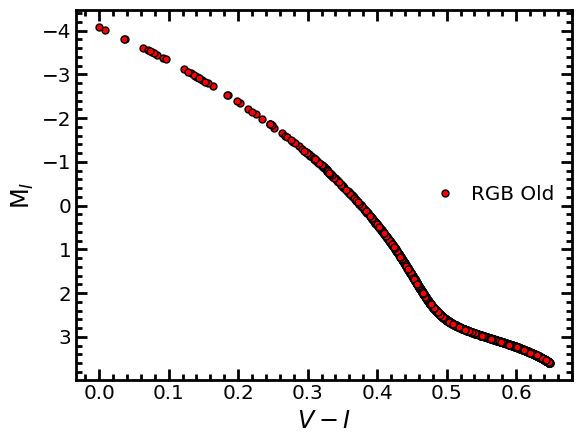

In [48]:
plt.plot(V_old[RGB_Old] - I_old[RGB_Old], I_old[RGB_Old], 'o', 
         c='red', mec='k', label='RGB Old', markersize=5)  # Adjust the markersize as needed

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$')  # Adding ylabel for completeness
plt.show()

In [45]:
# Use the function
average_of_top_3_lowest_old = find_average_of_top_3_lowest(I_old[RGB_Old])

# Print or use the average_of_top_10_lowest value as needed
print("Average of the top 3 lowest values (int):", average_of_top_3_lowest_old)

Average of the top 3 lowest values (int): -3.863987221229171


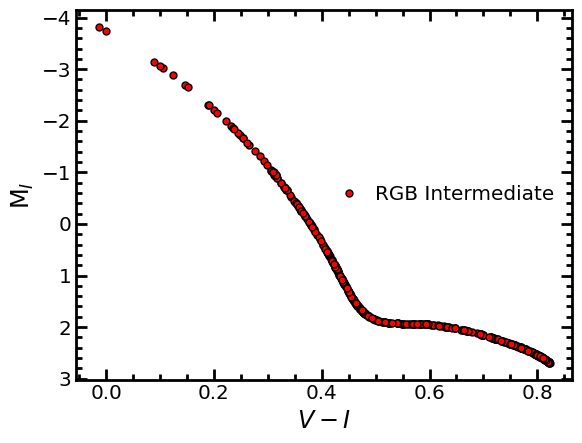

In [47]:
plt.plot(V_int[RGB_Int] - I_int[RGB_Int], I_int[RGB_Int], 'o', 
         c='red', mec='k', label='RGB Intermediate', markersize=5)  # Adjust the markersize as needed

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$')  # Adding ylabel for completeness
plt.show()

In [31]:
def find_average_of_top_3_lowest(arr):
    # Combine the index and values into a 2D array
    points = np.column_stack((np.arange(len(arr)), arr))
    
    # Sort points based on values in ascending order
    sorted_points = points[points[:, 1].argsort()]
    
    # Select the top 5 lowest values
    top_10_lowest_points = sorted_points[:5]
    
    # Calculate and return the average value of the selected points
    average_value = np.mean(top_10_lowest_points[:, 1])
    
    return average_value

In [43]:
# Use the function
average_of_top_3_lowest = find_average_of_top_3_lowest(I_int[RGB_Int])

# Print or use the average_of_top_10_lowest value as needed
print("Average of the top 3 lowest values (int):", average_of_top_3_lowest)


Average of the top 3 lowest values (int): -3.359566263270979


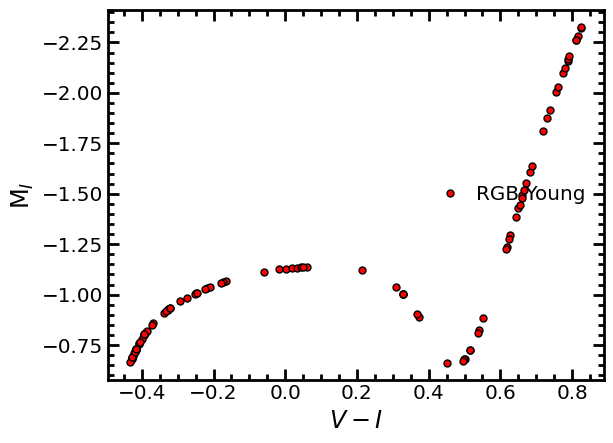

In [46]:
# Scatter plot with larger red dots
plt.plot(V_y[RGB_Young] - I_y[RGB_Young], I_y[RGB_Young], 'o', 
         c='red', mec='k', label='RGB Young', markersize=5)  # Adjust the markersize as needed

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$')  # Adding ylabel for completeness
plt.show()


In [35]:
# Use the function
average_of_top_3_lowest_young = find_average_of_top_3_lowest(I_y[RGB_Young])

# Print or use the average_of_top_10_lowest value as needed
print("Average of the top 3 lowest values (young):", average_of_top_3_lowest_young)

Average of the top 3 lowest values (young): -2.2911697915584375
